<div style="text-align: center"><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*aDmNbnJG5bgDcEoi7uyCyw.png" width="100%" heigh="100%" alt="Retrieve&Re-Rank pipeline"></div>

# Introduction

Outliers are exceptional data points within your dataset, caused by chance, anomalies, or even measurement errors. Effectively identifying and handling outliers is a complex yet critical process because ignoring them can lead to biased results. Pandas, the versatile data manipulation library in Python, provides a set of tools for efficiently handling outliers. In this step-by-step guide, we will explore what outliers are, how to detect them, what actions to take when handling them, and how to leverage pandas along the way. We will look at boxplots, z_scores and the interquartile range (IQR) method.

**Never Do it**
You should NEVER remove outliers without questioning their origin. Not all outliers are created equal and for some types of outliers there are strong arguments against removing them.

# Identifying Outliers Using Pandas

The first step in handling outliers is to identify their presence within your dataset. Outliers can be identified visually or by using metrics such as z-scores or the interquartile range (IQR) method. First, let’s quickly create some sample data.

In [1]:
'''
I use the numpy library to generate normally distributed data, 
add 5 outliers, then combine everything in a new DataFrame:
'''

# We need pandas and numpy so let's import both libraries
import pandas as pd
import numpy as np

# Next, we set a random seed for reproducibility
np.random.seed(42)

# Generate random data following a normal distribution 
# [Mean = 50, Standard Deviation = 10]
data = np.random.normal(loc=50, scale=10, size=1000)
  
# Introduce 5 outliers
outliers = np.random.normal(loc=200, scale=50, size=5)  
data = np.concatenate([data, outliers])

# Shuffle the data to randomize the order
np.random.shuffle(data)

# Create final DataFrame containing outliers
outlier_df = pd.DataFrame({'values': data})

Since `np.random.normal` creates random data, I first set a seed using `np.random.seed(42)`. By setting the same seed(42) in your code, you can create the same exact data points, even through they are random.

In this code snippet, we create a DataFrame `'outlier_df'` with one variable called `'value'` which contains 1000 normally distributed data points with man(M)=50 and standard deviation (SD) =10. `'value'` also contains 5 additional data points that follow a naomal distribution with M=200 and SD=50; ie., potential outliers. Let's try to find them:

**1) Idefitying Outliers: Visual Inspection**

The easiest method to spot outliers is to visually inspect the data (or plots thereof) to spot values that seem odd or don’t fit in with the rest of the data.

<Axes: >

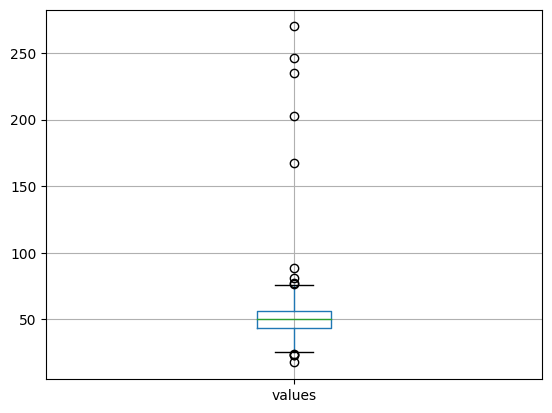

In [2]:
# create boxplot 
outlier_df.boxplot()

We can see that, as expected, most values lie between 0 and 100 and the median is around 50. This makes sense given that we created data that is normally distributed around a mean of 50 with a standard deviation of 10.

We can also see some values — 5 to be exact — that are above 150. They appear far from all other values, like outcasts struggling to fit in. We just identified the outliers!

In a boxplot, the data is divided into quartiles, with the central box representing the interquartile range (IQR) that spans the 25th to 75th percentiles. The line inside the box marks the median (50th percentile), and the “whiskers” (T-shaped lines) represent a limit of 1.5 * IQR.

We can also use different plots, such as histograms. Histograms are great to get a general feel for the distribution of a variable. It is often a good idea to start your data exploration by looking at a histogram. As you will see, they are not as powerful for spotting outliers though, especially compared to boxplots.

array([[<Axes: title={'center': 'values'}>]], dtype=object)

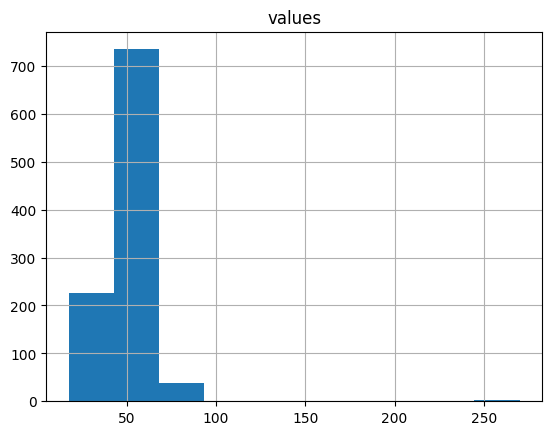

In [3]:
# Create histogram
outlier_df.hist()

Again, we can see that our data seems to be normally distributed around 50 (although it appears a little skewed). Looking at this histogram there don’t seem to be any outliers though, what’s up with that?

In this histogram, we can’t spot the 5 outliers since they get lost among the 1000 “normal” data points.

That’s the tricky thing about outliers. They don’t show up in large numbers (or else they wouldn’t be outliers). But even in low numbers they can disproportionately affect your analysis due to their exceptionally high or low values.

We can combat this by increasing the number of ‘bins’ for the histogram. The `hist()` function groups values into bins and then plots the bins. We can change the number of bins to use by changing the value for the bins parameter when calling the function:

<Axes: ylabel='Frequency'>

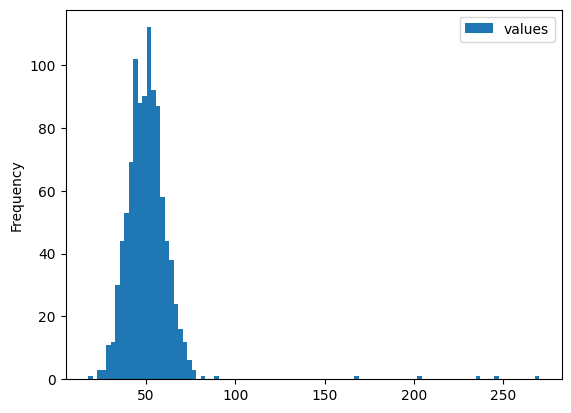

In [4]:
# creating another histogram with more bins 
outlier_df.plot.hist(bins=100)

In the context of histograms, a "bin" is a range of values that data is grouped into. When you create a histogram, you're essentially dividing the range of your data into intervals or bins and counting how many data points fall into each bin.

For example, if you have data ranging from 0 to 100 and you create a histogram with 10 bins, each bin might cover a range of 10 units (0-9, 10-19, 20-29, and so on). The height of each bar in the histogram represents the frequency or count of data points falling within that bin.

By adjusting the number of bins in a histogram, you can control the level of detail and granularity in visualizing the distribution of your data. More bins provide finer detail, while fewer bins give a more generalized view.

Increasing the number of bins made the histogram more granular. Now it looks more like a normal distribution and, more importantly, we can see the outliers. You might have to squint a bit but at the bottom right corner of the plot we can see our 5 outliers as tiny blue bars.

Using a higher bin count, we can visually identify outliers using a histogram. But as you notice, boxplots are far superior for visual outlier detection.

<Axes: ylabel='Frequency'>

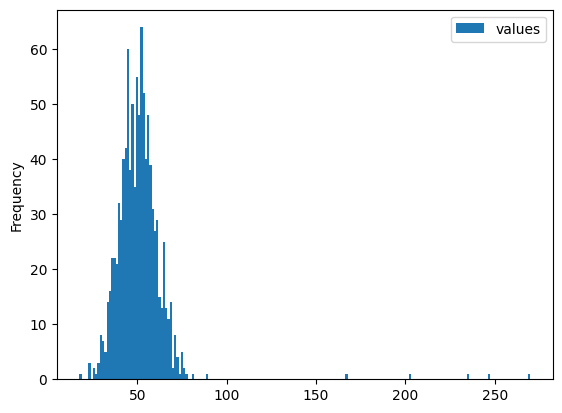

In [5]:
# creating another histogram with more bins 
outlier_df.plot.hist(bins=200)

**2) Identifying Outliers: z-Score**

Apart from visual identification, we can also calculate metrics to determine what represents “normal” values in our data. We can then look for data points that lie outside of this normal range of data to find our outliers.

For instance, we can calculate the so-called z-score for each data point. It measures the distance of a data point from the mean in standard deviations. High absolute z-scores can be considered outliers (usually z-scores greater than 2 or 3).

In [6]:
# Calculate the z-scores
z_scores = np.abs((outlier_df['values'] - outlier_df['values'].mean()) / outlier_df['values'].std())

# Add z_scores as a new column to our DataFrame
outlier_df['z_scores'] = z_scores

We obtain the `z_scores` by calculating the distance from the mean `outlier_df — outlier_df.mean()` and dividing it by the standard deviation `outlier_df.std()` for each data point. We use `np.abs`to get absolute values. This is necessary, since we want to identify potential outliers both higher and lower than the rest of the data. Finally, I added the z_scores to the DataFrame.

Each value in our DataFrame now has its own z_score, representing how far off it is from the rest of the data.

For example, we can see that the z_score `0.246940` of value 54.979983 in row 3 is higher than the z_score `0.127266` of value 49.039401 in row 0. That’s because the mean of `'values'` is 51.0598 and 54 is further away from 51 than 49 is.

In [7]:
# quickly checking the mean of 'values'
outlier_df['values'].mean()

51.05976702436777

**3) Identifying Outliers: IQR Method**

The IQR is a statistical measure that provides insight into the spread of data within the interquartile range, which covers the middle 50% of the data. Calculate the IQR: Start by computing the IQR, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1).

In [8]:
# Calculate 25% percentile and 75% percentile
Q1 = outlier_df['values'].quantile(0.25)
Q3 = outlier_df['values'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

Next, we define **upper** and **lower bounds**. These are the bounds that define the range of “acceptable” or “normal” values.

Usually, the lower bound is defined as Q1 - 1.5 * IQR and the upper bound as Q3 + 1.5 * IQR. You can change out the 1.5 if you want your outlier detection to be more sensitive or less sensitive.

In [9]:
# Define lower and upper bounds
lower_bound = Q1-1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Now that we have the upper and lower bounds, we can identify our outliers: Data points falling below the lower bound or above the upper bound are considered potential outliers.

# Removing Outliers Using Pandas

Now, the only thing left to do is to remove our outliers. Remember that you should always think twice about removing outliers. **Never remove remove data points simply because they are outliers**.

If you are certain, that your outliers can be removed, for instance because they are created by measurement errors, you can go ahead and remove them from your data set.

**1) Removing Outliers Identified by Boxplot**

First, we used a boxplot to find our outliers. The plot revealed that all but 5 data points are within a range from 0 to 100. All five outliers had values well above 150. Therefore, we can easily remove the outliers like this:

In [10]:
# Remove outliers (values larger than 150)
cleaned_df = outlier_df[outlier_df['values'] <= 150]

To remove the outliers, we create a new DataFrame `df_cleaned` which only contains values from `outlier_df` that are smaller or equal to 150. We can confirm, whether the outlier removal was sucessfull by plotting another boxplot:

<Axes: >

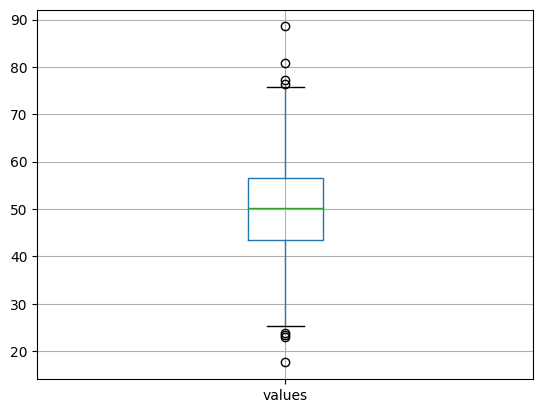

In [11]:
# select values column from cleaned_df
values = cleaned_df[['values']]

# create new boxplot for values
values.boxplot()

**2) Removing Outliers Identified by z-Score and IQR**

Removing outliers identified by z-score or IQR is equally straight-forward. To remove z-score outliers, remove all values that feature z-scores above a predefined threshold (usually 2 or 3).

In [12]:
# Define threshold (here: remove values with z-score > 2)
threshold = 2

# Remove outliers based on z-score and threshold
cleaned_df = outlier_df[outlier_df['z_scores'] <= threshold]

**Similarly for IQR:**

In [13]:
'''
We already defined lower and upper bounds above 
So now we only need to remove values that are: 

  1) lower that the lower bound
  2) higher than the upper bound

'''

# Remove outliers based on lower & upper bounds
cleaned_df = outlier_df[(outlier_df['values'] >= lower_bound) & 
                        (outlier_df['values'] <= upper_bound)]

# Conclusion

Handling outliers is a crucial step in data analysis and is essential for producing accurate and meaningful results. With the power of Pandas and statistical methods, you can effectively identify and manage outliers, ensuring that your analyses are based on reliable data. By incorporating these techniques into your data analysis workflow, you’ll be better equipped to derive valuable insights from your datasets.

**Credit**:

https://python.plainenglish.io/identifying-and-handling-outliers-in-pandas-a-step-by-step-guide-fcecd5c6cd3b